# Topic: H.A.R.N.
## Scope: Agriculture
### Project Team: Maitri, Faryar and Mrunali


# A. Image Analysis & Preprocessing

##  Import Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import random
import cv2
import os
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, RandomFlip, RandomRotation, RandomZoom, Rescaling
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 
%matplotlib inline


## Load Dataset

### Path Configuration

In [2]:
healthy_dir ='../input/harn-rice-ds/HARN RICE DS/Healthy'
n_def_dir = '../input/harn-rice-ds/HARN RICE DS/N_Deficiency'
p_def_dir = '../input/harn-rice-ds/HARN RICE DS/P_Deficiency'
k_def_dir = '../input/harn-rice-ds/HARN RICE DS/K_Deficiency'
dataset_dir = '../input/harn-rice-ds/HARN RICE DS'

In [3]:
def load_random_imgs_from_folder(folder):
  plt.figure(figsize=(20,20))
  for i in range(5):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.xlabel(f'Image Shape: {img.shape}')
    plt.imshow(img)

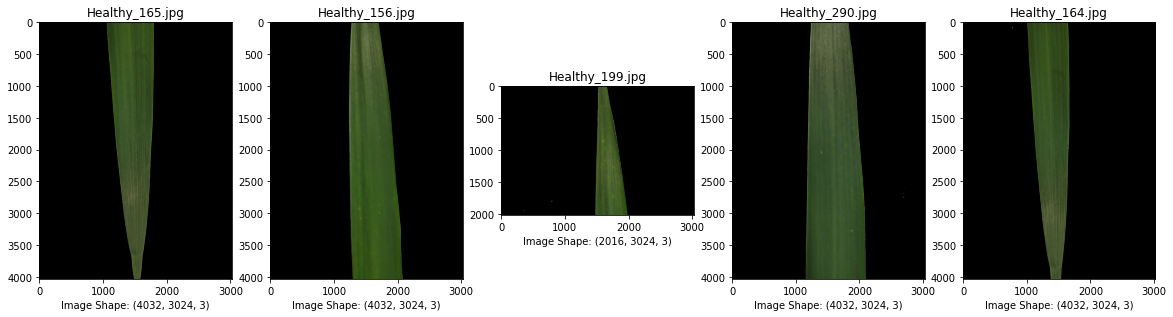

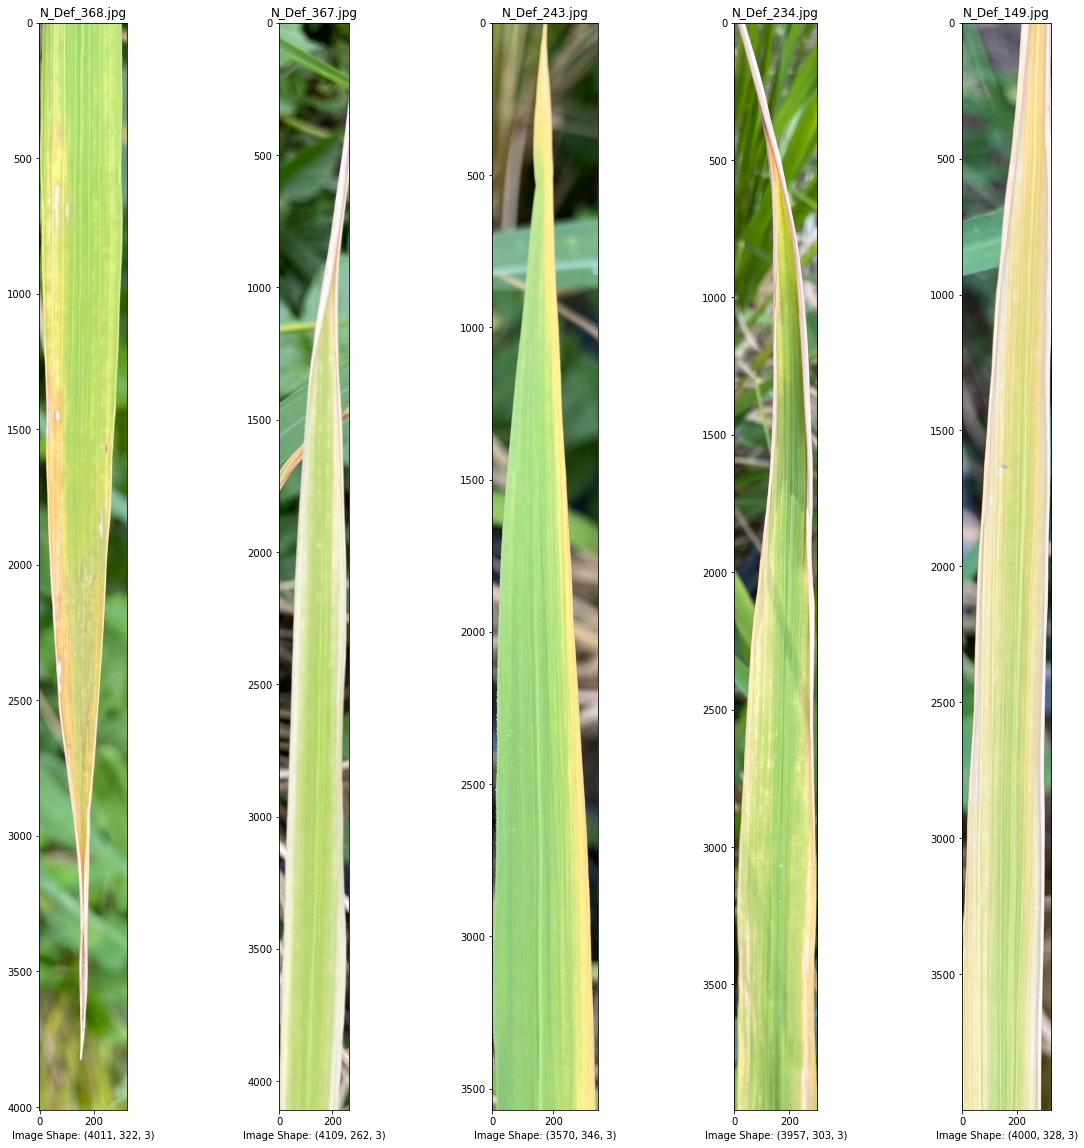

In [4]:
load_random_imgs_from_folder(healthy_dir)
print('\n\n')
load_random_imgs_from_folder(n_def_dir)

## Renaming the file names

In [5]:
# def rename_imgs(category, path):
#   # print(os.getcwd())
#   os.chdir(path)
#   print(os.getcwd())
#   for index, filename in enumerate(os.listdir(".")):
#     # print(filename, index)
#     os.rename(filename, f'{category}_{index+1}.jpg')
#     # print(filename)

In [6]:
# rename_imgs('Healthy', healthy_dir)
# rename_imgs('N_Def', n_def_dir)
# rename_imgs('P_Def', p_def_dir)
# rename_imgs('K_Def', k_def_dir)

## Resize image without losing its aspect ratio

In [7]:
# from PIL import Image
# import PIL
# def resize_imgs(image, fixed_height):
# #     image = Image.open(img_path)
# #     image.load()
#     height_percent = (fixed_height / float(image.size[1]))
#     width_size = int((float(image.size[0]) * float(height_percent)))
#     image = image.resize((width_size, fixed_height), PIL.Image.NEAREST)
#     return np.array(image)
# # image.save('resized_nearest.jpg')

In [8]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized


## Create a dataframe


In [9]:
labels=[]
for i in os.listdir(dataset_dir):
  labels+=[i]

print(labels)

['P_Deficiency', 'Healthy', 'N_Deficiency', 'K_Deficiency']


In [10]:
IMG_SIZE = 224

In [11]:
# img_size = 224
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
              if img[-3:] != 'txt':
                
#                 image = Image.open(os.path.join(path, img)
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
#                 resized_arr = image_resize(img_arr, height = IMG_SIZE)
#                 resized_arr = resize_imgs(image, IMG_SIZE) # Reshaping images to preferred size
                resized_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)
  

In [12]:
dataset = get_data(dataset_dir)
np.random.shuffle(dataset)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:
len(dataset)

1530

In [14]:
train = dataset[:1070]
val = dataset[1070:1300]
test = dataset[1300:]

In [15]:
# train = dataset[:1021]
# val = dataset[1021:1192]
# test = dataset[1192:]

In [16]:
train_df = pd.DataFrame(train,columns=['Feature','Label'])

In [17]:
# train_df.head(5)

In [18]:
l=[]
for i in train_df['Label']:
  l.append(labels[i])

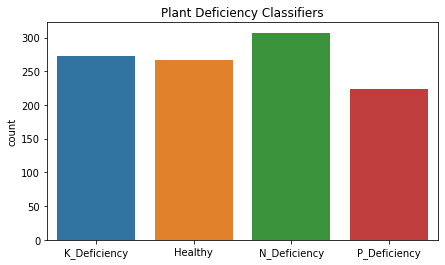

In [19]:
plt.figure(figsize=(7,4))
sns.countplot(x=l);
plt.title('Plant Deficiency Classifiers');

## Splitting the dataset

In [20]:
# X, test_img, Y, test_labels = train_test_split(df['Images'], df['Label'], test_size=0.2, shuffle = True, random_state = 2)

In [21]:
# x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, shuffle = True, random_state = 2)

In [22]:
# # checking the balance of classifiers in the y_train
# print(y_train.value_counts())
# plt.figure(figsize=(7,4))
# sns.countplot(y_train);
# plt.title('Malaria Classifiers');

In [23]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)

# Image Preprocessing

## Normalizing the dataset

In [24]:
np.array(x_train).max()

255

In [25]:
np.array(x_train)

array([[[[  8,  63,   0],
         [  6,  64,   1],
         [  7,  65,   2],
         ...,
         [ 67, 133,   0],
         [ 68, 134,   2],
         [ 68, 135,   0]],

        [[ 11,  62,   2],
         [  9,  63,   1],
         [  9,  60,   3],
         ...,
         [ 62, 131,   1],
         [ 63, 134,   2],
         [ 67, 137,   1]],

        [[ 21,  70,   1],
         [ 21,  69,   1],
         [ 22,  70,   1],
         ...,
         [ 68, 133,   2],
         [ 70, 138,   1],
         [ 72, 141,   1]],

        ...,

        [[250, 254, 230],
         [248, 255, 224],
         [246, 254, 215],
         ...,
         [105, 180,  91],
         [100, 173,  87],
         [112, 181,  96]],

        [[248, 254, 224],
         [247, 254, 220],
         [231, 251, 201],
         ...,
         [108, 184,  95],
         [106, 178,  92],
         [114, 182,  97]],

        [[248, 255, 223],
         [228, 248, 199],
         [196, 235, 155],
         ...,
         [106, 185,  95],
        

Text(0.5, 1.0, 'Healthy')

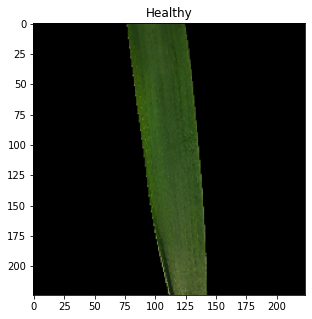

In [26]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [27]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_val = np.array(x_val)
y_val = np.array(y_val)


In [28]:
x_test = np.array(x_test) / 255.0
y_test = np.array(y_test)

In [29]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape

((1070, 224, 224, 3),
 (1070,),
 (230, 224, 224, 3),
 (230,),
 (230, 224, 224, 3),
 (230,))

In [30]:
type(y_train[0])

numpy.int64

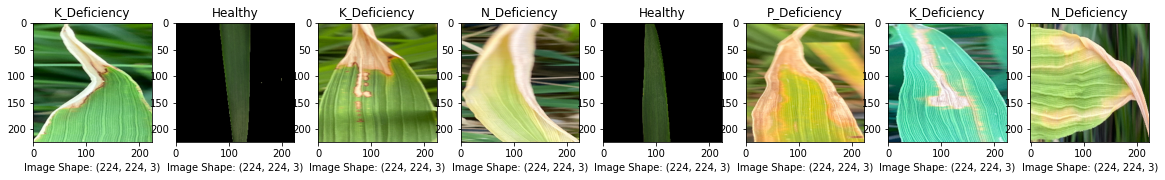

In [31]:
plt.figure(figsize=(20,20))

for i in range(8):
  img = x_train[i]
  ax=plt.subplot(1,8,i+1)
  ax.title.set_text(labels[y_train[i]])
  plt.xlabel(f'Image Shape: {img.shape}')
  plt.imshow(img)


## Image Preprocessing

In [32]:
def plot_before_after(img, filtered_img):
  plt.figure(figsize=(10,10))
  plt.subplot(121),plt.imshow(img),plt.title('Original')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(filtered_img),plt.title('Filtered')
  plt.xticks([]), plt.yticks([])
  plt.show()


In [33]:
class Filters:
  def __init__(self, x_train):
    self.x_train = x_train
  
  def Gaussian_Blurr(self, kernel):
    self.kernel = kernel
    gauss_blurr = []
    for i in range(len(self.x_train)-1):
      f_img = cv2.GaussianBlur(self.x_train[i], self.kernel,0)
      gauss_blurr.append(f_img)
    return gauss_blurr

  def Median_Blurr(self, K):
    self.K = K
    median_blurr = []
    for i in range(len(self.x_train)-1):
      img = self.x_train[i].astype('float32') / 255.0
      f_img = cv2.medianBlur(img, self.K)
      median_blurr.append(f_img)
    return median_blurr

  def Bilateral_Blurr(self, diameter, sigmaColor, sigmaSpace):
    self.d = diameter
    self.sc = sigmaColor
    self.ss = sigmaSpace
    bilateral_blurr = []
    for i in range(len(self.x_train)-1):
      img = self.x_train[i].astype('float32') / 255.0
      f_img = cv2.bilateralFilter(img, self.d, self.sc, self.ss)
      bilateral_blurr.append(f_img)
    return bilateral_blurr

In [34]:
img_filter = Filters(x_train)

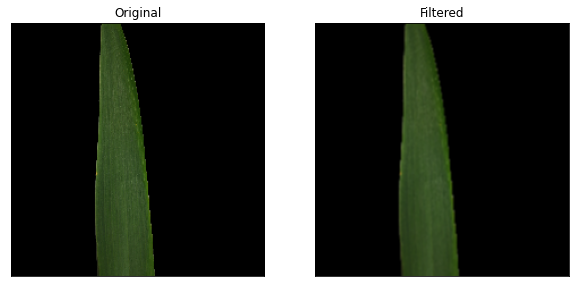

In [35]:
gauss_imgs = img_filter.Gaussian_Blurr((3,3))
plot_before_after(x_train[4], gauss_imgs[4])

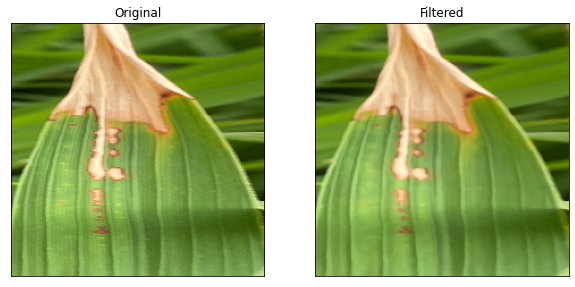

In [36]:
medians = img_filter.Median_Blurr(3)
plot_before_after(x_train[2], medians[2])

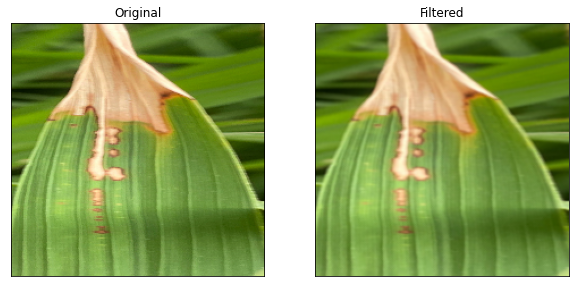

In [37]:
bilateral_imgs = img_filter.Bilateral_Blurr(3, 11, 5)
plot_before_after(x_train[2], bilateral_imgs[2])

## Image Augmentation

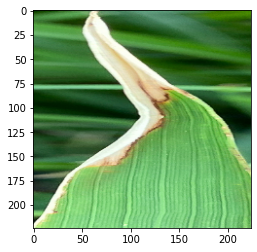

In [38]:
plt.imshow(x_train[0])

In [39]:
x_train[0].shape

(224, 224, 3)

In [40]:
# y_train=y_train.reshape(1070,1)
# y_val=y_val.reshape(230,1)

# # y_train=y_train.reshape(1021,1)
# # y_val=y_val.reshape(171,1)

In [41]:
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [42]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0, 
    featurewise_center=False,  # set input mean to 0 over the dataset 
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.2, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip = True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [43]:
# prepare an iterators to scale images
train_iterator_1 = train_datagen.flow(x_train, y_train, batch_size=64)
val_iterator_1 = val_datagen.flow(x_val, y_val, batch_size=64)
print('Batches train=%d, test=%d' % (len(train_iterator_1), len(val_iterator_1)))


Batches train=17, test=4


In [44]:

# confirm the scaling works
batchX, batchy = train_iterator_1.next()
print('Batch shape=%s, min=%.3f, max=%.3f' % (batchX.shape, batchX.min(), batchX.max()))


Batch shape=(64, 224, 224, 3), min=0.000, max=1.000


# Functions

In [45]:
def learning_curve(model_fit, key='accuracy', ylim=(0.8, 1.01)):
    plt.figure(figsize=(12,6))
    plt.plot(model_fit.history[key])
    plt.plot(model_fit.history['val_' + key])
    plt.title('Learning Curve')
    plt.ylabel(key.title())
    plt.xlabel('Epoch')
    plt.ylim(ylim)
    plt.legend(['train', 'val'], loc='best')
    plt.show()

In [46]:
def confusion_matrix_plot(matrix, model):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(labels); 
    ax.yaxis.set_ticklabels(labels);
#     plt.savefig(f'CM_{model}.png', dpi=300)
    plt.show()


In [47]:
def cal_score(model, key):
    
        # evaluate the model
    _, train_acc = model.evaluate(x_train/255.0, y_train, verbose=0)
    _, test_acc = model.evaluate(x_test, y_test, verbose=0)
    _, val_acc = model.evaluate(x_val/255.0, y_val, verbose=0)


    print('Train: %.3f, Test: %.3f, Val: %.3f' % (train_acc, test_acc, val_acc))

    # predict probabilities for test set
    yprobs = model.predict(x_test, verbose=0)
    # predict crisp classes for test set
    yclasses = np.argmax(yprobs,axis=1)


    test_kappa = cohen_kappa_score(y_test, yclasses)
    print('Test Cohens kappa: %f' % test_kappa)
#     val_kappa = cohen_kappa_score(y_val, yclasses)
#     print('Val Cohens kappa: %f' % val_kappa)
    print('\n')
    # confusion matrix
    matrix = confusion_matrix(y_test, yclasses)
    print(matrix)
    print('\n')

    f1 = f1_score(y_test, yclasses, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    
    print(classification_report(y_test, yclasses, target_names=labels))
    
    if key==1:
        confusion_matrix_plot(matrix, model)

# Modelling

### MODEL 1

In [48]:
callbacks = [EarlyStopping(monitor='val_loss', patience=2, verbose=0),
             ModelCheckpoint(filepath='best2.h5', save_best_only=True)]

In [49]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [50]:
from tensorflow.keras.applications.xception import Xception

In [51]:
model3 = Sequential([
    
    # layer 1
    Conv2D(32, kernel_size=(7, 7), activation='relu', padding='same', input_shape=x_train[0].shape),
    Conv2D(32, kernel_size=(7, 7), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # layer 2
    Conv2D(64, kernel_size=(7, 7), activation='relu', padding='same'),
#     Conv2D(64, kernel_size=(5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    # layer 3
    Conv2D(128, kernel_size=(5, 5), activation='relu', padding='same'),
#     Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
    Flatten(),
    
    # Fully Connected Layer
    Dense(128, activation='relu'),
#     BatchNormalization(),
    Dropout(0.5),
    
    Dense(4, activation='softmax'),

])

2022-04-10 21:33:02.405726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 21:33:02.487209: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 21:33:02.487997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-10 21:33:02.489437: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [52]:

# lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=1e-3, decay_steps=5000, decay_rate=0.01)
optimizer = keras.optimizers.Adam(learning_rate=0.0001)

model3.compile(optimizer = optimizer, 
                   loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                   metrics = ['accuracy'])

In [53]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      4736      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 218, 218, 32)      50208     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 109, 109, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      100416    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [54]:
hist = model3.fit_generator(train_iterator_1,epochs=20,verbose=1,validation_data=val_iterator_1, callbacks = callbacks)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-10 21:33:05.736765: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-04-10 21:33:07.771291: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


17/17 [==============================] - 23s 810ms/step - loss: 1.2550 - accuracy: 0.3252 - val_loss: 1.2684 - val_accuracy: 0.4870
Epoch 2/20
17/17 [==============================] - 12s 689ms/step - loss: 1.1257 - accuracy: 0.5271 - val_loss: 1.0825 - val_accuracy: 0.5435
Epoch 3/20
17/17 [==============================] - 12s 714ms/step - loss: 0.9252 - accuracy: 0.6131 - val_loss: 0.8662 - val_accuracy: 0.6304
Epoch 4/20
17/17 [==============================] - 11s 671ms/step - loss: 0.7417 - accuracy: 0.6645 - val_loss: 0.7533 - val_accuracy: 0.7217
Epoch 5/20
17/17 [==============================] - 11s 667ms/step - loss: 0.6184 - accuracy: 0.7299 - val_loss: 0.6442 - val_accuracy: 0.7087
Epoch 6/20
17/17 [==============================] - 12s 712ms/step - loss: 0.6087 - accuracy: 0.7262 - val_loss: 0.6637 - val_accuracy: 0.7652
Epoch 7/20
17/17 [==============================] - 11s 663ms/step - loss: 0.5796 - accuracy: 0.7467 - val_loss: 0.6268 - val_accuracy: 0.7783
Epoch 8/20

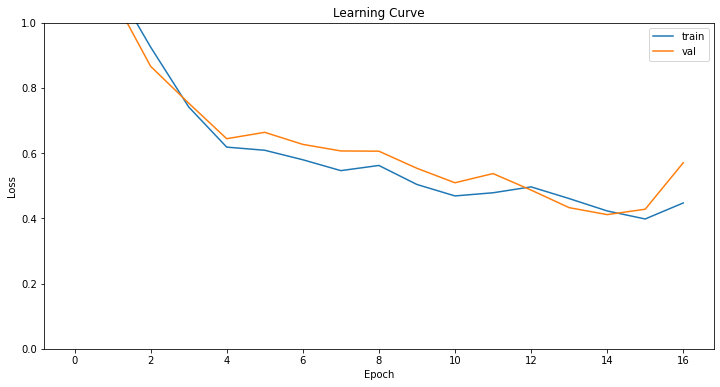

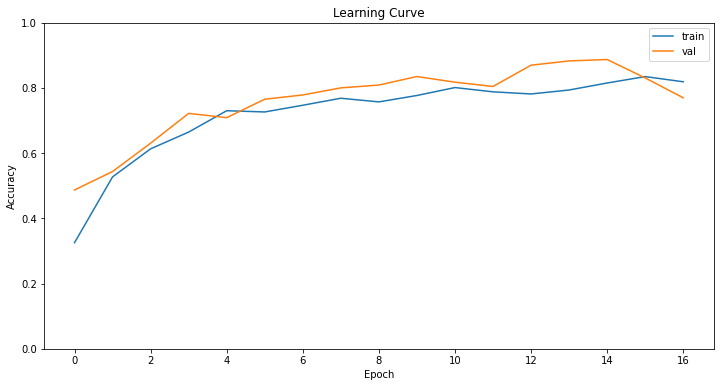

In [55]:
learning_curve(hist,'loss', ylim=(0,1))
learning_curve(hist, 'accuracy', ylim=(0,1))

2022-04-10 21:36:42.159619: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644259840 exceeds 10% of free system memory.
2022-04-10 21:36:42.830951: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644259840 exceeds 10% of free system memory.


Train: 0.732, Test: 0.717, Val: 0.770
Test Cohens kappa: 0.626381


[[50  0  1  6]
 [ 0 57  0  0]
 [36  0 25 10]
 [12  0  0 33]]


F1 Score: 0.7042081581459481


              precision    recall  f1-score   support

P_Deficiency       0.51      0.88      0.65        57
     Healthy       1.00      1.00      1.00        57
N_Deficiency       0.96      0.35      0.52        71
K_Deficiency       0.67      0.73      0.70        45

    accuracy                           0.72       230
   macro avg       0.79      0.74      0.72       230
weighted avg       0.80      0.72      0.70       230



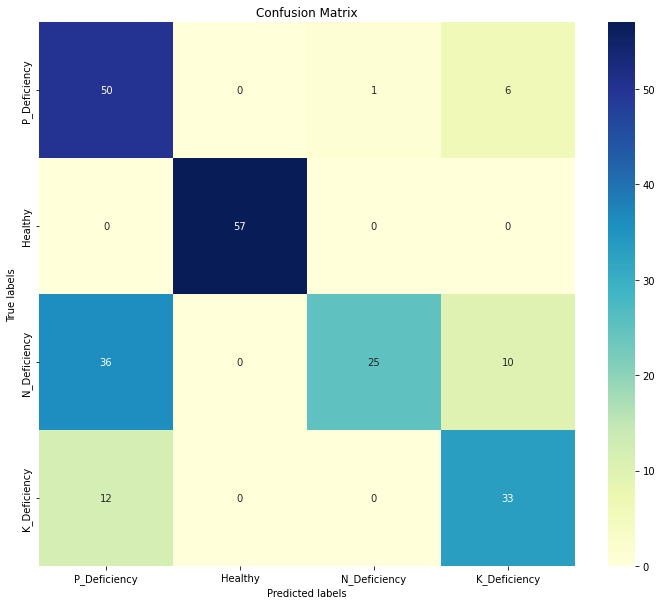

In [56]:
cal_score(model3, 1)

In [57]:
from tensorflow.keras.models import load_model

best_model = load_model('./best2.h5')

2022-04-10 21:36:49.190509: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644259840 exceeds 10% of free system memory.
2022-04-10 21:36:49.851945: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 644259840 exceeds 10% of free system memory.


Train: 0.871, Test: 0.917, Val: 0.887
Test Cohens kappa: 0.889120


[[47  0  2  8]
 [ 0 57  0  0]
 [ 5  0 66  0]
 [ 3  0  1 41]]


F1 Score: 0.9175541826351261


              precision    recall  f1-score   support

P_Deficiency       0.85      0.82      0.84        57
     Healthy       1.00      1.00      1.00        57
N_Deficiency       0.96      0.93      0.94        71
K_Deficiency       0.84      0.91      0.87        45

    accuracy                           0.92       230
   macro avg       0.91      0.92      0.91       230
weighted avg       0.92      0.92      0.92       230



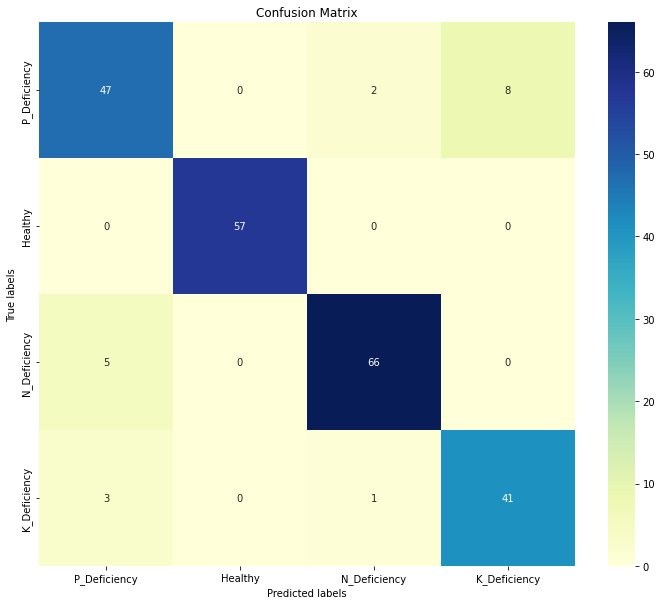

In [58]:
cal_score(best_model, 1)

In [59]:
# model3.save('custom-83f1.hdf5')